#**Heart Disease Prediction Application**
Attribute Information:

1.age = age in years

2.sex= (1 = male; 0 = female)

3.cp = chest pain type
4.target = 1(Yes) or 0(No)
The goal of this task is to predict whether a patient has heart disease or not based on 14 clinical parameters. These parameters include the patient's age, sex, chest pain type, blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise, slope of the peak exercise ST segment, number of major vessels, and thalassemia.The dataset includes 76 attributes, but previous studies have focused on using a subset of 14 attributes for the prediction task.

#**Machine Learning Model**
The machine learning algorithms used for this prediction are 

1)Logistic Regression, 

2)K Nearest Neighbors, 

3)Support Vector Machine, 

4)Naive Bayes, and 

5)Random Forest. 

In [1]:
#libraries importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#describe the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

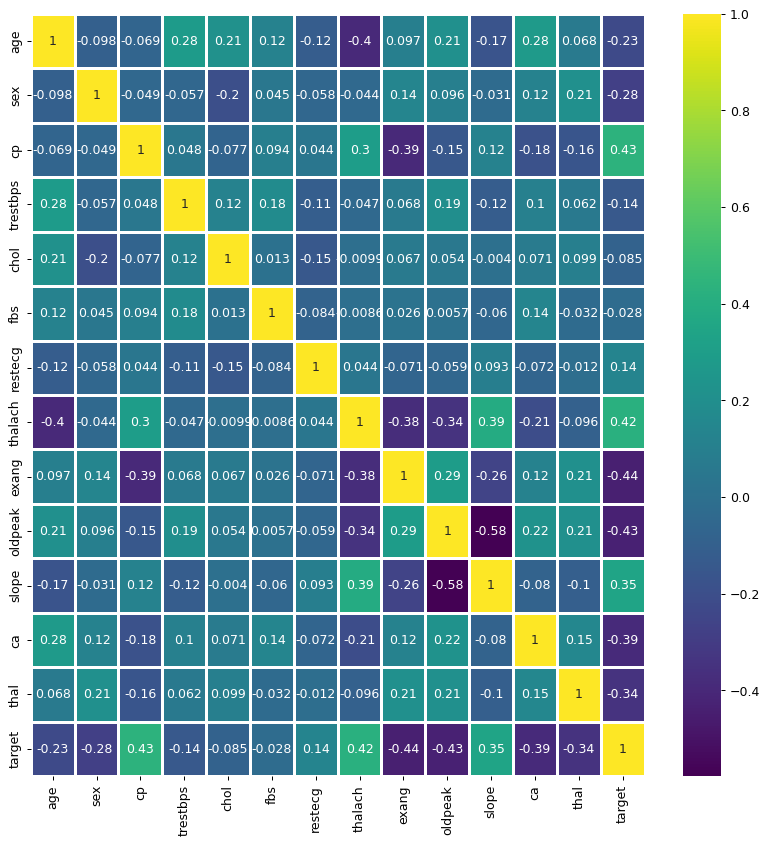

In [9]:
# Heatmap is to visualize the relationships between different features in the DataSet
plt.figure(figsize=(11,11), dpi = 90)
sns.heatmap(df.corr(), cmap = "viridis", annot = True, linewidths= 1)
plt.show()

In [10]:
#age analysis from the data set
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

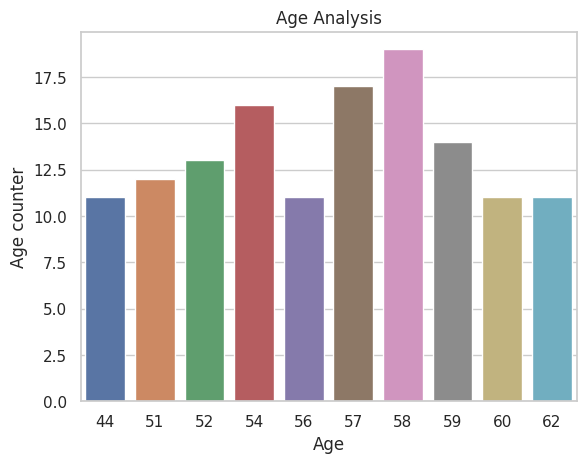

In [14]:
 #Bar plot using Seaborn to visualize the age distribution
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [15]:
#Target attributes value count
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

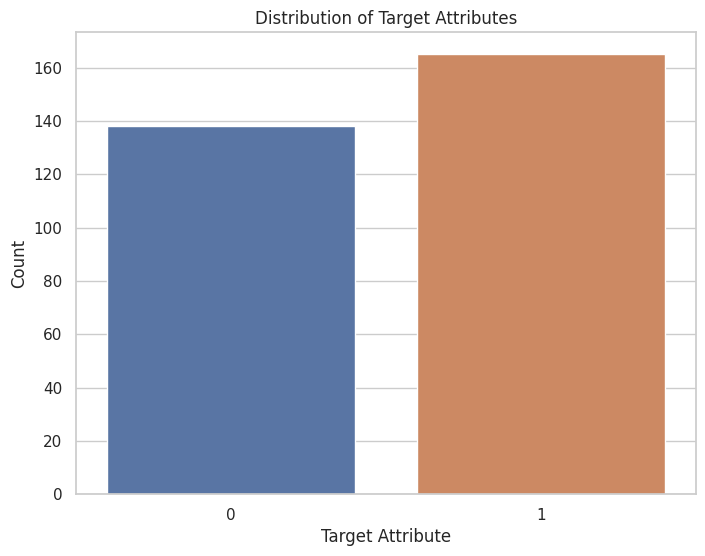

In [19]:
# 1-> Heart Disease
# 0-> No Heart Disease
target_counts = df['target'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Attributes')
plt.xlabel('Target Attribute')
plt.ylabel('Count')
plt.show()


In [16]:
#Count the percentage of heart-disease person and non-disease person
# 0---> no and 1---> heart-disease
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients don't have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients don't have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


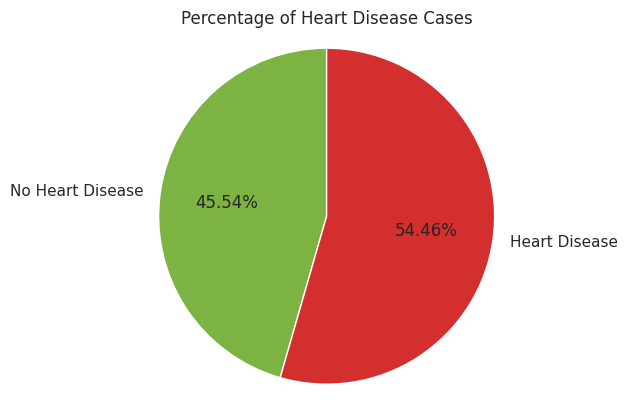

In [20]:
# Count the occurrences of each target attribute
countNoDisease = len(df[df['target'] == 0])
countHaveDisease = len(df[df['target'] == 1])

# Calculate the percentages
percent_no_disease = (countNoDisease / len(df['target'])) * 100
percent_have_disease = (countHaveDisease / len(df['target'])) * 100

# Create a pie chart
labels = ['No Heart Disease', 'Heart Disease']
sizes = [percent_no_disease, percent_have_disease]
colors = ['#7CB342', '#D32F2F']  # Green and Red colors for the pie slices

plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
plt.title('Percentage of Heart Disease Cases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [17]:
#Count the percentage of female and male from the dataset
# 0---> female and 1---> male
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("The percentage of Female Patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("The percentage of male Patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

The percentage of Female Patients: 31.68%
The percentage of male Patients: 68.32%


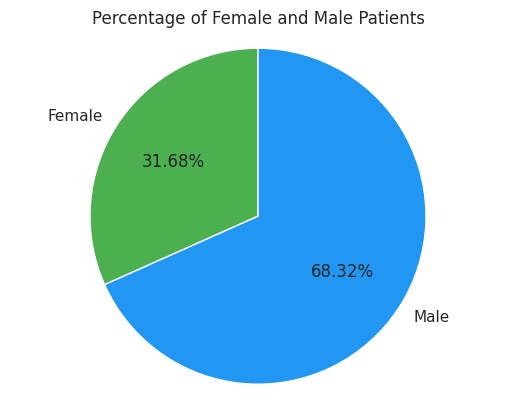

In [21]:
# Count the occurrences of each sex attribute
countFemale = len(df[df['sex'] == 0])
countMale = len(df[df['sex'] == 1])

# Calculate the percentages
percent_female = (countFemale / len(df['sex'])) * 100
percent_male = (countMale / len(df['sex'])) * 100

# Create a pie chart
labels = ['Female', 'Male']
sizes = [percent_female, percent_male]
colors = ['#4CAF50', '#2196F3']  # Green and Blue colors for the pie slices

plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
plt.title('Percentage of Female and Male Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
#Describe the age attributes with age range
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


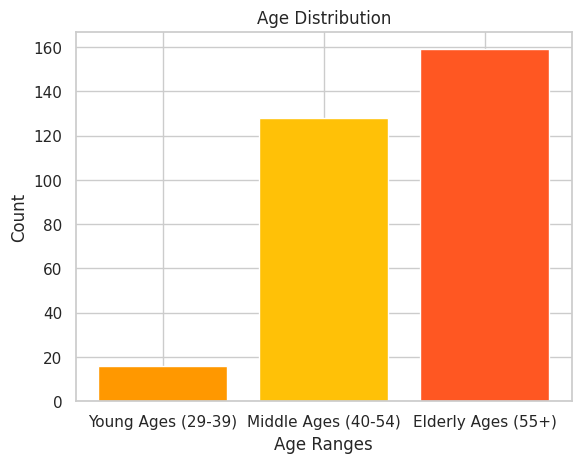

In [22]:
#Describe the age attributes with Visualization
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the age attribute

# Define the age ranges
age_ranges = ['Young Ages (29-39)', 'Middle Ages (40-54)', 'Elderly Ages (55+)']

# Count the occurrences in each age range
young_ages = len(df[(df['age'] >= 29) & (df['age'] < 40)])
middle_ages = len(df[(df['age'] >= 40) & (df['age'] < 55)])
elderly_ages = len(df[df['age'] >= 55])

# Create a bar plot
plt.bar(age_ranges, [young_ages, middle_ages, elderly_ages], color=['#FF9800', '#FFC107', '#FF5722'])
plt.title('Age Distribution')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.show()

In [24]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [25]:
# checking the distribution of Target Variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [27]:
# Model Building
x_data = df.drop(['target'], axis = 1)
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state= 0)

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Accuracy of LR = {:.2f}%'.format(lr.score(x_test, y_test)*100))

Accuracy of LR = 85.25%


In [29]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("Accuracy of KNN = {:.2f}%".format(knn.score(x_test, y_test)*100))

Accuracy of KNN = 63.93%


In [30]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("Accuracy of SVC = {:.2f}%".format(svm.score(x_test, y_test)*100))

Accuracy of SVC = 68.85%


In [31]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of NB = {:.2f}%".format(nb.score(x_test, y_test)*100))

Accuracy of NB = 85.25%


In [32]:
# Random forset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state= 1)
rf.fit(x_train, y_train)
print("Accuracy of Random Forest = {:.2f}%".format(rf.score(x_test, y_test)*100))

Accuracy of Random Forest = 85.25%


# Let's Visulize the accuracy of Each Model and see the Comparision of the accuracy of each model **bold text**

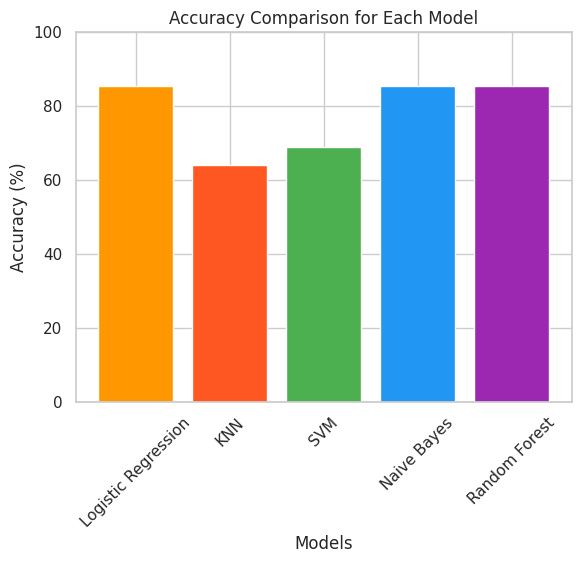

In [33]:
# Visualization of the accuracies for each model
accuracy_lr = lr.score(x_test, y_test) * 100
accuracy_knn = knn.score(x_test, y_test) * 100
accuracy_svm = svm.score(x_test, y_test) * 100
accuracy_nb = nb.score(x_test, y_test) * 100
accuracy_rf = rf.score(x_test, y_test) * 100

# Create a bar plot
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest']
accuracies = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_nb, accuracy_rf]
colors = ['#FF9800', '#FF5722', '#4CAF50', '#2196F3', '#9C27B0']

plt.bar(models, accuracies, color=colors)
plt.title('Accuracy Comparison for Each Model')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 100])  # Set the y-axis range from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# **Note: 
**Comparision of the Result = 

We can see that Logistic Regression , Naive Bayes and Random Forest have given the high accuracy. On the other hand KNN and SVM have given us the lower accuracy compare to the Logistic Regression , Naive Bayes and Random Forest.**